# Experimento 1 - Efic√°cia da Personaliza√ß√£o

**Objetivo**: Avaliar se a etapa de personaliza√ß√£o (Tailor) torna as respostas mais √∫teis, claras e alinhadas ao perfil do usu√°rio, utilizando exclusivamente modelos de linguagem de grande porte (LLMs) como avaliadores autom√°ticos.

**Metodologia**
* Escolher 3 perfis de usu√°rio,
  * Para cada perfil, elaborar 10 perguntas,
    * Para cada pergunda, responder com e sem o m√≥dulo de personaliza√ß√£o.
    * Submeter o par de respostas (com e sem o m√≥dulo de personaliza√ß√£o) √† LLM avaliadora.

Crit√©rios de avalia√ß√£o da LLM:
* UtilidadeGeral,
* Alinhamento com o Perfil,
* Clareza na Comunica√ß√£o,
* Personaliza√ß√£o Percept√≠vel

Cada crit√©rio foi aplicado 20 vezes para cada resposta e uma m√©dia foi calculada.

## Crit√©rios de Avalia√ß√£o

| Nome                       | Objetivo claro                                                    | Base compar√°vel                        |
|----------------------------|--------------------------------------------------------------------|----------------------------------------|
| `FocoRelevanteAoPerfil`    | Verifica se os dados mencionados foram bem escolhidos              | Usa infer√™ncia a partir do contexto    |
| `AdequacaoDeLinguagemAoPerfil` | Testa se o tom e vocabul√°rio mudam conforme o p√∫blico             | Lingu√≠stica e tom textual              |
| `OrganizacaoTextualEClareza`   | Avalia se a estrutura facilita compreens√£o                        | Permite an√°lise objetiva de par√°grafos |
| `PersonalizacaoDetectavel`     | Verifica se h√° sinais expl√≠citos de customiza√ß√£o                   | Verific√°vel por qualquer LLM           |

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

In [3]:
# Substitua o caminho abaixo se necess√°rio
with open("/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/evaluation_results_with_repetitions_experiment_1.json", "r", encoding="utf-8") as f:
    resultados = json.load(f)

# Expandir para um DataFrame
linhas = []
for item in resultados:
    for i in range(len(item["scores_resposta_padrao"])):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "repeticao": i + 1,
            "score_padrao": item["scores_resposta_padrao"][i],
            "score_personalizada": item["scores_resposta_personalizada"][i]
        })

df = pd.DataFrame(linhas)
df.head()

pergunta            perfil  \
0  Bruno Pacheco foi bem no jogo contra o Cear√° n...  Torcedor do Time   
1  Bruno Pacheco foi bem no jogo contra o Cear√° n...  Torcedor do Time   
2  Bruno Pacheco foi bem no jogo contra o Cear√° n...  Torcedor do Time   
3  Bruno Pacheco foi bem no jogo contra o Cear√° n...  Torcedor do Time   
4  Bruno Pacheco foi bem no jogo contra o Cear√° n...  Torcedor do Time   

         criterio  repeticao  score_padrao  score_personalizada  
0  UtilidadeGeral          1          8.62                 9.93  
1  UtilidadeGeral          2          8.62                 9.95  
2  UtilidadeGeral          3          8.65                 9.94  
3  UtilidadeGeral          4          8.65                 9.92  
4  UtilidadeGeral          5          8.71                 9.94

Os testes estat√≠sticos (t pareado) realizados para todos os perfis indicaram diferen√ßas altamente significativas (p < 0.0001) entre as respostas padr√£o e personalizadas em todos os crit√©rios avaliados (Utilidade Geral, Alinhamento com o Perfil, Clareza na Comunica√ß√£o e Personaliza√ß√£o Percept√≠vel). Esses resultados confirmam que a personaliza√ß√£o das respostas gerou ganhos reais e consistentes, n√£o atribu√≠veis ao acaso.

In [8]:
# Comparar m√©dias e p-valores por crit√©rio e perfil
for perfil in df["perfil"].unique():
    print(f"Perfil: {perfil}")
    subset_perfil = df[df["perfil"] == perfil]
    resultados = []
    for criterio in subset_perfil["criterio"].unique():
        sub = subset_perfil[subset_perfil["criterio"] == criterio]
        stat, p = ttest_rel(sub["score_personalizada"], sub["score_padrao"])
        resultados.append({
            "Crit√©rio": criterio,
            "M√©dia Padr√£o": round(sub["score_padrao"].mean(), 2),
            "M√©dia Personalizada": round(sub["score_personalizada"].mean(), 2),
            "Valor-p": round(p, 4),
            "Significativo": "‚úÖ" if p < 0.05 else "‚ùå"
        })
    display(pd.DataFrame(resultados))

Perfil: Torcedor do Time


Crit√©rio  M√©dia Padr√£o  M√©dia Personalizada  Valor-p  \
0             UtilidadeGeral          7.95                 8.71      0.0   
1      AlinhamentoComOPerfil          6.90                 8.27      0.0   
2       ClarezaNaComunicacao          7.92                 8.55      0.0   
3  PersonalizacaoPerceptivel          6.93                 8.51      0.0   

  Significativo  
0             ‚úÖ  
1             ‚úÖ  
2             ‚úÖ  
3             ‚úÖ

Perfil: T√©cnico do Time


Crit√©rio  M√©dia Padr√£o  M√©dia Personalizada  Valor-p  \
0             UtilidadeGeral          8.25                 9.13      0.0   
1      AlinhamentoComOPerfil          7.71                 8.86      0.0   
2       ClarezaNaComunicacao          8.62                 8.97      0.0   
3  PersonalizacaoPerceptivel          8.16                 9.02      0.0   

  Significativo  
0             ‚úÖ  
1             ‚úÖ  
2             ‚úÖ  
3             ‚úÖ

Perfil: Narrador do Jogo


Crit√©rio  M√©dia Padr√£o  M√©dia Personalizada  Valor-p  \
0             UtilidadeGeral          8.78                 9.69      0.0   
1      AlinhamentoComOPerfil          7.41                 8.85      0.0   
2       ClarezaNaComunicacao          8.78                 9.40      0.0   
3  PersonalizacaoPerceptivel          7.19                 8.89      0.0   

  Significativo  
0             ‚úÖ  
1             ‚úÖ  
2             ‚úÖ  
3             ‚úÖ

In [25]:
# Agrupar por crit√©rio
df_agg = df.groupby("criterio")[["score_padrao", "score_personalizada"]].agg(["mean", "std"]).round(2)
df_agg.columns = ['Padr√£o_M√©dia', 'Padr√£o_DP', 'Personalizada_M√©dia', 'Personalizada_DP']
df_agg["Ganho (%)"] = ((df_agg["Personalizada_M√©dia"] - df_agg["Padr√£o_M√©dia"]) / df_agg["Padr√£o_M√©dia"] * 100).round(2)
df_agg.reset_index(inplace=True)
df_agg

criterio  Padr√£o_M√©dia  Padr√£o_DP  Personalizada_M√©dia  \
0      AlinhamentoComOPerfil          7.34       2.03                 8.66   
1       ClarezaNaComunicacao          8.44       1.85                 8.97   
2  PersonalizacaoPerceptivel          7.43       1.85                 8.81   
3             UtilidadeGeral          8.33       2.12                 9.18   

   Personalizada_DP  Ganho (%)  
0              1.70      17.98  
1              1.83       6.28  
2              1.64      18.57  
3              1.87      10.20

Sobre o desvio padr√£o alto no gr√°fico abaixo:

1.	Alta variabilidade entre execu√ß√µes do GEval: como cada pontua√ß√£o foi obtida a partir de m√∫ltiplas execu√ß√µes com LLMs (por exemplo, 20 repeti√ß√µes), √© poss√≠vel que a varia√ß√£o entre essas respostas tenha sido alta. Isso pode acontecer se:
  * O modelo de avalia√ß√£o for sens√≠vel ao wording da resposta.
  * A resposta analisada tiver ambiguidade ou estrutura que permite m√∫ltiplas interpreta√ß√µes.
2. Menor consist√™ncia da LLM avaliadora: alguns crit√©rios s√£o mais subjetivos (como Alinhamento com o Perfil ou Personaliza√ß√£o Percept√≠vel), e modelos como o GPT podem variar levemente de julgamento entre execu√ß√µes. Mesmo pequenas varia√ß√µes nas frases da resposta podem gerar varia√ß√µes de pontua√ß√£o.
3. Limita√ß√£o das escalas de avalia√ß√£o: embora a escala v√° de 0 a 10, os intervalos avaliativos podem n√£o ser linearmente percebidos pela LLM, o que pode ampliar a dispers√£o num√©rica entre respostas similares.

Talvez n√£o seja necessariamente um problema, j√° que os p-values est√£o mostrando uma diferen√ßa m√©dia significativa.


<span style="color:red">*Fazer o mesmo gr√°fico separado por perfil*.</span>


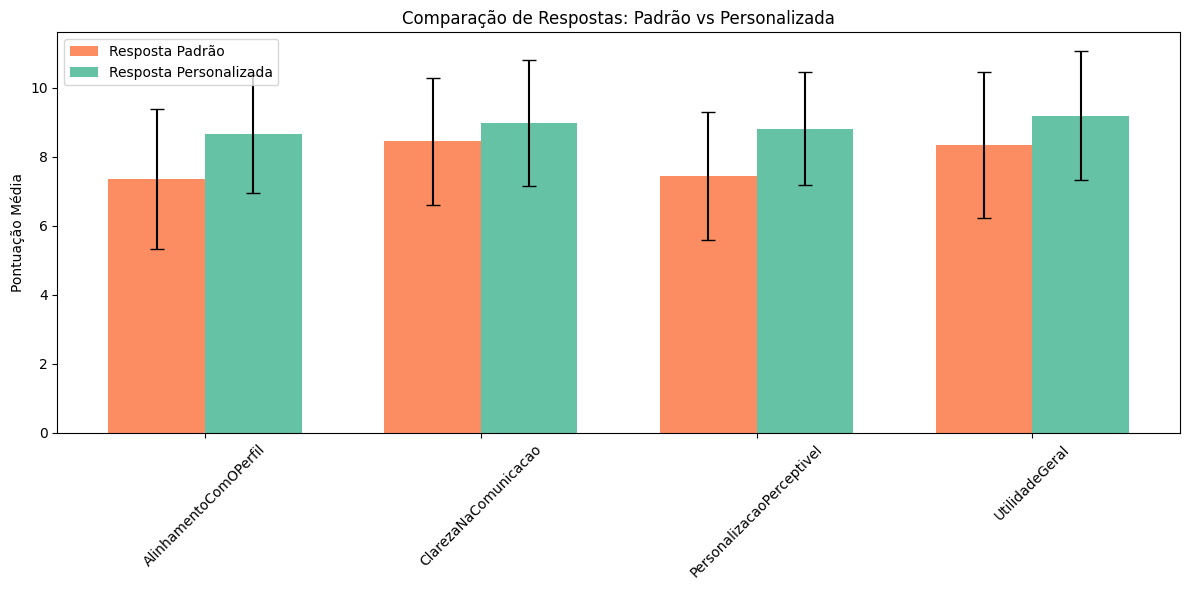

In [6]:
# Gr√°fico de barras com desvio padr√£o
x = range(len(df_agg))
largura = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar([i - largura/2 for i in x], df_agg["Padr√£o_M√©dia"], yerr=df_agg["Padr√£o_DP"], width=largura, capsize=5, label="Resposta Padr√£o", color="#fc8d62")
ax.bar([i + largura/2 for i in x], df_agg["Personalizada_M√©dia"], yerr=df_agg["Personalizada_DP"], width=largura, capsize=5, label="Resposta Personalizada", color="#66c2a5")

ax.set_xticks(x)
ax.set_xticklabels(df_agg["criterio"], rotation=45)
ax.set_ylabel("Pontua√ß√£o M√©dia")
ax.set_title("Compara√ß√£o de Respostas: Padr√£o vs Personalizada")
ax.legend()
plt.tight_layout()
plt.show()

Observa-se que, em todos os crit√©rios, as caixas referentes √†s respostas personalizadas apresentam medianas superiores √†s das respostas padr√£o, com menor dispers√£o e menos presen√ßa de outliers negativos. Este padr√£o refor√ßa a hip√≥tese de que o processo de personaliza√ß√£o, baseado no perfil do usu√°rio e no uso consciente das observa√ß√µes factuais, contribui para respostas mais bem avaliadas.


<span style="color:red">*Fazer o mesmo gr√°fico separado por perfil*.</span>

<span style="color:red">*Fazer uma an√°lise dos outliers*.</span>

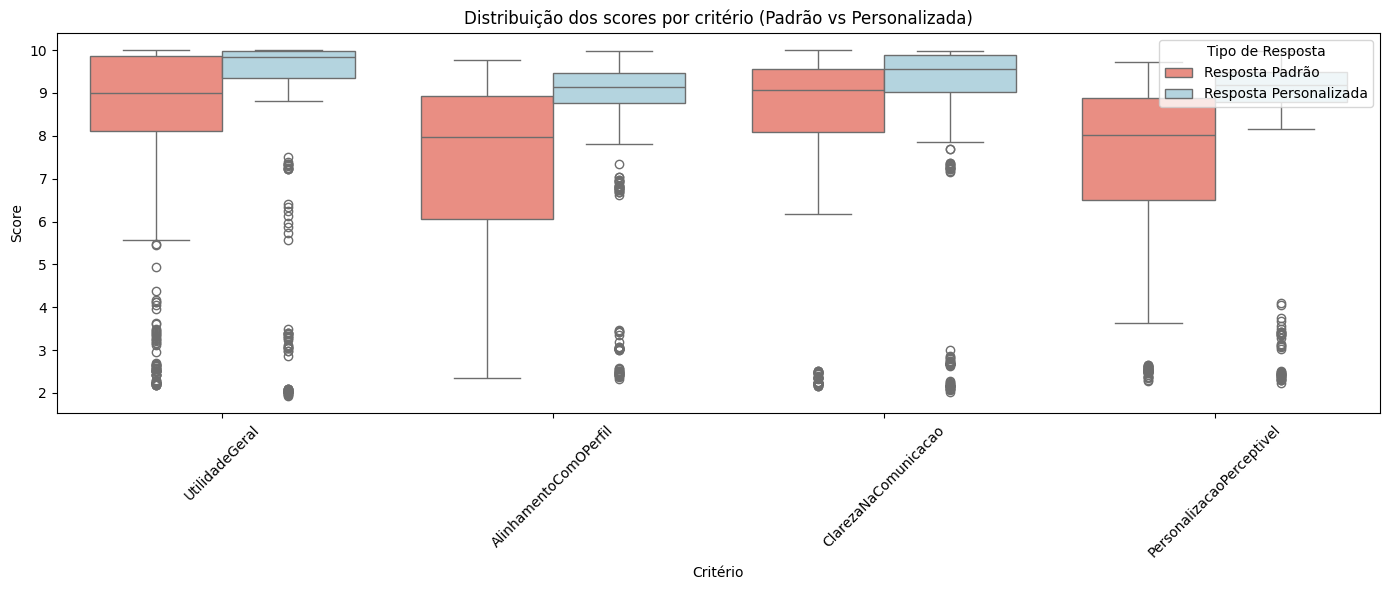

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que voc√™ tenha um DataFrame df com as colunas: ['criterio', 'score_padrao', 'score_personalizada']

# Reformata o DataFrame para formato longo
df_longo = pd.melt(
    df,
    id_vars=["criterio"],
    value_vars=["score_padrao", "score_personalizada"],
    var_name="tipo",
    value_name="score"
)

# Renomeia os tipos para deixar mais leg√≠vel na legenda
df_longo["tipo"] = df_longo["tipo"].map({
    "score_padrao": "Resposta Padr√£o",
    "score_personalizada": "Resposta Personalizada"
})

# Cria o boxplot com legenda e boxes lado a lado
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_longo, x="criterio", y="score", hue="tipo", palette={"Resposta Padr√£o": "salmon", "Resposta Personalizada": "lightblue"})
plt.title("Distribui√ß√£o dos scores por crit√©rio (Padr√£o vs Personalizada)")
plt.ylabel("Score")
plt.xlabel("Crit√©rio")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Resposta", loc="upper right")
plt.tight_layout()
plt.show()

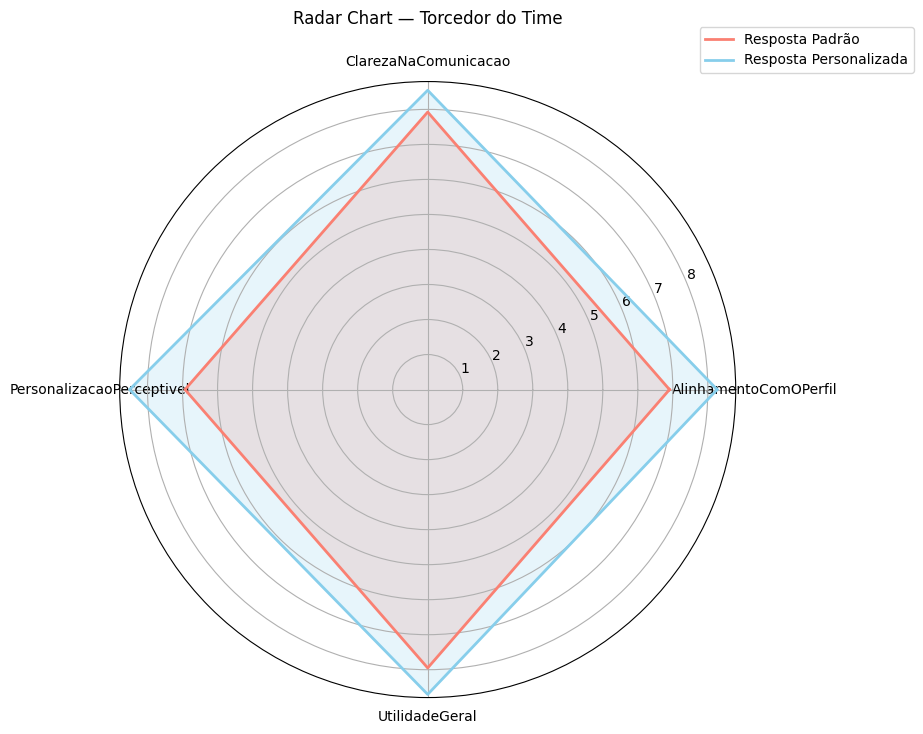

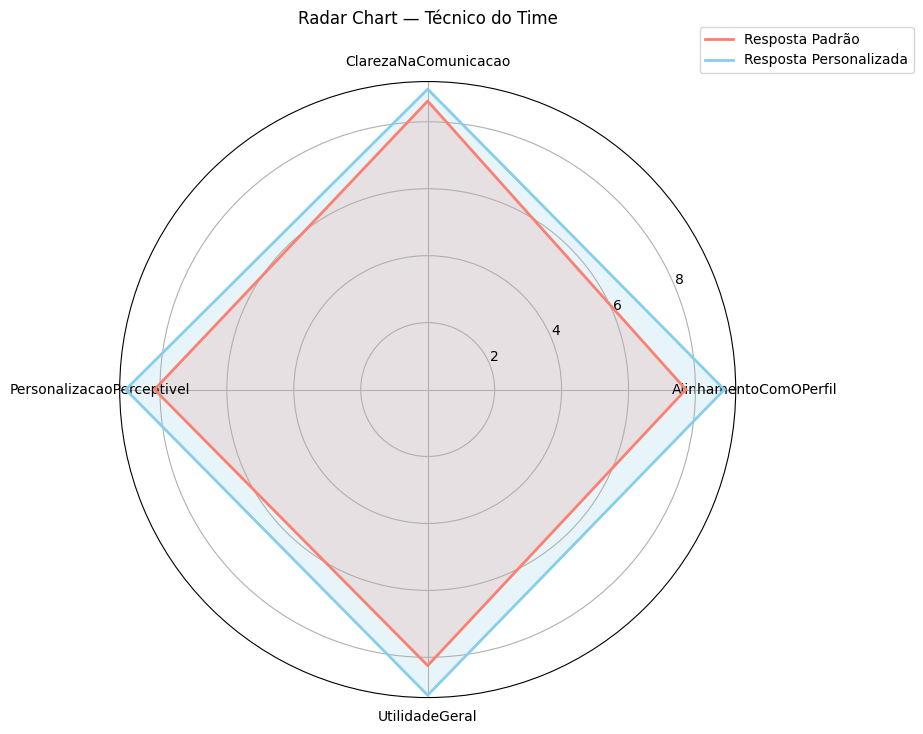

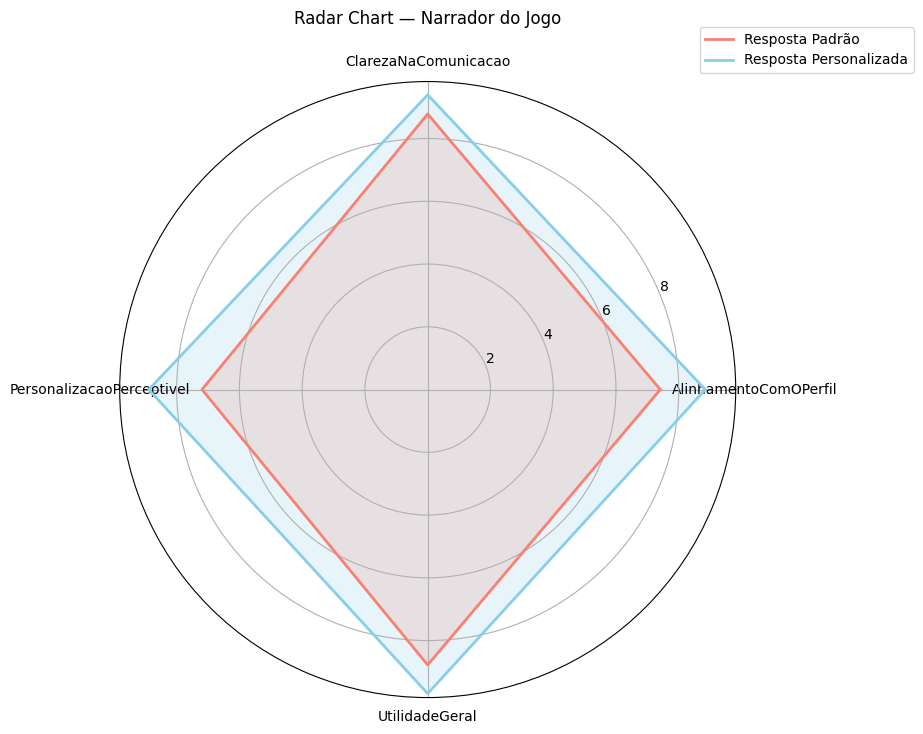

In [37]:
def plot_radar_chart_por_perfil(df, perfil):
    # Filtra pelo perfil desejado
    df_perfil = df[df["perfil"] == perfil]

    # Calcula a m√©dia por crit√©rio
    agg = df_perfil.groupby("criterio")[["score_padrao", "score_personalizada"]].mean().reset_index()

    # Preparar categorias e valores
    categorias = agg["criterio"].tolist()
    valores_padrao = agg["score_padrao"].tolist()
    valores_personalizada = agg["score_personalizada"].tolist()

    # √Çngulos (sem duplicar categoria aqui ainda)
    num_vars = len(categorias)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += [angles[0]]  # Fechar o c√≠rculo

    # Adicionar o primeiro valor ao final para fechar o radar
    valores_padrao += [valores_padrao[0]]
    valores_personalizada += [valores_personalizada[0]]

    # Criar figura
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Plotar
    ax.plot(angles, valores_padrao, label="Resposta Padr√£o", linewidth=2, color="salmon")
    ax.fill(angles, valores_padrao, alpha=0.2, color="salmon")

    ax.plot(angles, valores_personalizada, label="Resposta Personalizada", linewidth=2, color="skyblue")
    ax.fill(angles, valores_personalizada, alpha=0.2, color="skyblue")

    # Labels
    ax.set_xticks(angles[:-1])  # Retira o √∫ltimo (duplicado)
    ax.set_xticklabels(categorias, fontsize=10)

    ax.set_title(f"Radar Chart ‚Äî {perfil}", y=1.08)
    ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

    plt.show()
    
# Exemplo de uso:
plot_radar_chart_por_perfil(df, perfil="Torcedor do Time")
plot_radar_chart_por_perfil(df, perfil="T√©cnico do Time")
plot_radar_chart_por_perfil(df, perfil="Narrador do Jogo")

In [27]:
vitorias = df[df["score_personalizada"] > df["score_padrao"]]
taxa = len(vitorias) / len(df)
print(f"A resposta personalizada venceu em {taxa:.0%} dos casos.")

A resposta personalizada venceu em 90% dos casos.


# An√°lise qualitativa com exemplos selecionados

**Perfil:** Torcedor  
**Pergunta:** Bruno Pacheco foi bem no jogo contra o Cear√° no dia 1¬∫ de abril de 2023 ou deixou a desejar?

üî∏ **Resposta padr√£o:**  
> Bruno Pacheco teve uma m√©dia de velocidade de 1.36 m/s, uma m√©dia de acelera√ß√£o de -0.0077 m/s¬≤ e realizou 0.36 sprints. Esses n√∫meros indicam um desempenho abaixo do esperado, sugerindo que ele deixou a desejar no jogo contra o Cear√°.

üîπ **Resposta personalizada:**  
> Bruno Pacheco teve um desempenho que pode ser considerado abaixo do esperado no jogo contra o Cear√° em 1¬∫ de abril de 2023. Ele apresentou uma m√©dia de velocidade de 1.36 m/s, o que indica uma movimenta√ß√£o limitada em campo. Al√©m disso, sua m√©dia de acelera√ß√£o foi de -0.0077 m/s¬≤, sugerindo dificuldades em ganhar velocidade rapidamente. O n√∫mero de sprints, que foi de apenas 0.36, tamb√©m refor√ßa a ideia de que ele n√£o conseguiu se destacar na partida. Como torcedor, √© compreens√≠vel que voc√™ esperasse mais dele, e esses dados mostram que ele deixou a desejar nesse confronto.

üéØ **An√°lise:** A resposta personalizada utiliza tom emp√°tico, vocabul√°rio voltado ao torcedor e interpreta os dados de forma mais acess√≠vel.

# Problemas

Talvez os crit√©rios ainda n√£o estejam bons.